# 6.2.5 Autoencoders

## Explanation of Autoencoders

Autoencoders are a type of artificial neural network used to learn efficient codings of unlabeled data. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Autoencoders consist of an encoder and a decoder network.

### Key Components

- **Encoder**: Maps the input data to a lower-dimensional representation.
- **Latent Space**: The lower-dimensional representation of the input data.
- **Decoder**: Maps the lower-dimensional representation back to the original data space.
- **Reconstruction Loss**: Measures the difference between the input data and its reconstruction.

### Types of Autoencoders

1. **Undercomplete Autoencoder**: The latent space has a smaller dimension than the input space, used for dimensionality reduction.
2. **Sparse Autoencoder**: A regularization term is added to enforce sparsity in the latent representation.
3. **Denoising Autoencoder**: The input data is corrupted with noise, and the autoencoder is trained to recover the original data.
4. **Variational Autoencoder (VAE)**: Uses a probabilistic approach to model the latent space, generating new data samples.


## Benefits and Use Cases of Autoencoders

1. **Dimensionality Reduction**: Reducing the dimensionality of data while preserving its essential features.
2. **Anomaly Detection**: Identifying anomalies by comparing the reconstruction error.
3. **Data Denoising**: Removing noise from data by training on noisy inputs and clean outputs.
4. **Image Compression**: Compressing images by learning efficient encodings.
5. **Generative Modeling**: Generating new data samples similar to the training data, particularly with VAEs.


___
___
### Readings:
- [Introduction to autoencoders.](https://www.jeremyjordan.me/autoencoders/)
- [Applied Deep Learning - Autoencoders](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798)
- [Dimensionality Reduction using AutoEncoders in Python](https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/)
- [Dimensionality Reduction: PCA versus Autoencoders](https://readmedium.com/en/https:/towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d)
- [The encoder-decoder model as a dimensionality reduction technique](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html)
___
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
# Define autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [4]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3872 - val_loss: 0.1902
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1796 - val_loss: 0.1528
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1485 - val_loss: 0.1339
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1321 - val_loss: 0.1219
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1207 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1127 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1069 - val_loss: 0.1024
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1028 - val_loss: 0.0991
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1000 - val_loss: 0.0969
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0978 - val_loss: 0.0954
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0964 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [5]:
# Encode and decode the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


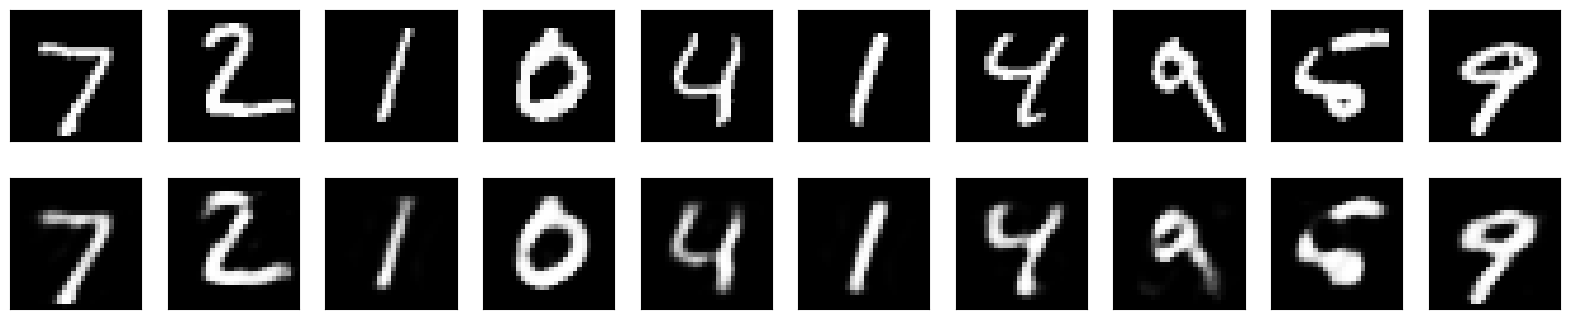

In [6]:
# Plotting results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

___
## Python Implementation of Autoencoders for Dimensionality Reduction

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

In [8]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [9]:
# Define autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 64  # Reduced dimensionality

In [10]:
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [11]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3509 - val_loss: 0.1644
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1543 - val_loss: 0.1274
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1234 - val_loss: 0.1088
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1069 - val_loss: 0.0978
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0970 - val_loss: 0.0906
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0902 - val_loss: 0.0854
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0854 - val_loss: 0.0818
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0821 - val_loss: 0.0793
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0799 - val_loss: 0.0776
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0780 - val_loss: 0.0763
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0769 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [13]:
# Encode the test set
encoded_imgs = encoder.predict(x_test)

# Visualize the reduced dimensionality data with t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_test_embedded = tsne.fit_transform(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


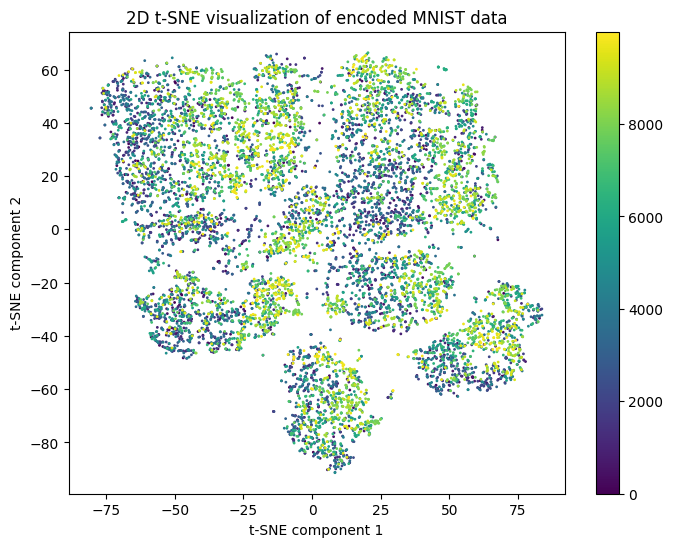

In [14]:
# Plotting results
plt.figure(figsize=(8, 6))
plt.scatter(x_test_embedded[:, 0], x_test_embedded[:, 1], c=np.arange(len(x_test_embedded)), s=1, cmap='viridis')
plt.title('2D t-SNE visualization of encoded MNIST data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar()
plt.show()

## Conclusion

Autoencoders are powerful tools for dimensionality reduction, providing a way to compress data while preserving its essential structure. By learning a lower-dimensional representation of the data, autoencoders can facilitate data visualization, clustering, and noise reduction.

### Key Points

- **Efficient Data Compression**: Autoencoders reduce the dimensionality of data, making it easier to analyze and visualize.
- **Preservation of Structure**: The lower-dimensional representations retain important information about the original data.
- **Versatility**: Autoencoders can be applied to various types of data, including images, text, and time-series data.

The Python implementation demonstrates how an autoencoder can be used to reduce the dimensionality of the MNIST dataset, with the t-SNE visualization highlighting the effectiveness of the learned representations.
